<a href="https://colab.research.google.com/github/FGalvao77/Prevendo-valor-de-acoes---PETROBRAS-PETR4.SA-/blob/main/Prevendo_valor_de_a%C3%A7%C3%B5es_PETROBRAS_(PETR4_SA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prevendo _valor de ações_ - `PETROBRAS (PETR4.SA)`**

---



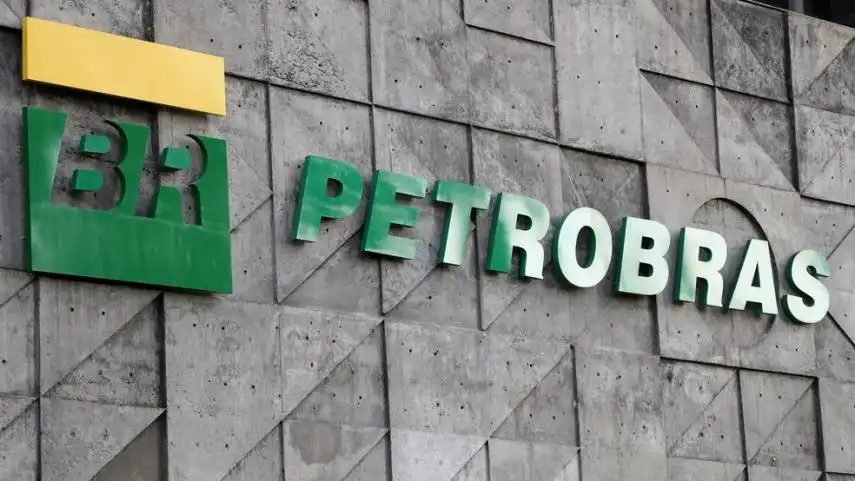

Iremos utilizar uma **RNA** para prever o valor das ações para os próximos 10 dias, com base no histórico de uma série temporal.

In [ ]:
# instalando a biblioteca 
!pip install yfinance

In [ ]:
# biblioteca para ignorar mensagens de alerta
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# importando as bibliotecas e as funções necessárias

import pandas as pd         # manipulação de dados
import numpy as np          # modelagem matámatica
import yfinance as yf       # dados financeiros

from sklearn.preprocessing import StandardScaler        # normalização dos dados
from sklearn.model_selection import train_test_split    # particionamento dos dados

# funções de rede neural
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# visualização gráfica
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# # função para carregar o conjunto de dados para o google colab
# from google.colab import files
# uploaded = files.upload

In [ ]:
# importando o conjunto de dados
data_PETR = 'PETR4.SA' # Petróleo Brasileiro S.A. - Petrobras (PBR)

In [ ]:
# instanciando o conjunto de dados no objeto "df"
df = yf.download(data_PETR)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# visualizando as 5 primeiras linhas 
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,5.875,5.875,5.875,5.875,3.203311,35389440000
2000-01-04,5.550,5.550,5.550,5.550,3.026107,28861440000
2000-01-05,5.494,5.494,5.494,5.494,2.995573,43033600000
2000-01-06,5.475,5.475,5.475,5.475,2.985214,34055680000
2000-01-07,5.500,5.500,5.500,5.500,2.998846,20912640000


In [ ]:
# informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5529 entries, 2000-01-03 to 2022-01-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5529 non-null   float64
 1   High       5529 non-null   float64
 2   Low        5529 non-null   float64
 3   Close      5529 non-null   float64
 4   Adj Close  5529 non-null   float64
 5   Volume     5529 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 302.4 KB


In [ ]:
# resetando o índice
df = df.reset_index()
df.dtypes   # tipo de dados dos atributos

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [ ]:
display(
    df.head(10),    # visualizando as 10 primeiras linhas
    df.tail(10)     # visualizando as 10 últimas linhas
)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,5.875,5.875,5.875,5.875,3.203311,35389440000
1,2000-01-04,5.550,5.550,5.550,5.550,3.026107,28861440000
2,2000-01-05,5.494,5.494,5.494,5.494,2.995573,43033600000
3,2000-01-06,5.475,5.475,5.475,5.475,2.985214,34055680000
4,2000-01-07,5.500,5.500,5.500,5.500,2.998846,20912640000
5,2000-01-10,5.613,5.613,5.613,5.613,3.060457,19563520000
6,2000-01-11,5.475,5.475,5.475,5.475,2.985214,23987200000
7,2000-01-12,5.483,5.483,5.483,5.483,2.989574,23301120000
8,2000-01-13,5.325,5.325,5.325,5.325,2.903427,26383360000
9,2000-01-14,5.400,5.400,5.400,5.400,2.944321,16657920000


,Date,Open,High,Low,Close,Adj Close,Volume
5519,2021-12-17,29.320000,29.639999,28.780001,28.990000,28.990000,93593700
5520,2021-12-20,28.440001,28.549999,27.680000,28.160000,28.160000,106282500
5521,2021-12-21,28.549999,28.719999,28.120001,28.200001,28.200001,40454500
5522,2021-12-22,28.400000,28.400000,27.969999,28.160000,28.160000,33734500
5523,2021-12-23,28.330000,28.420000,28.150000,28.330000,28.330000,28713600
5524,2021-12-27,28.320000,28.780001,28.150000,28.750000,28.750000,44227900
5525,2021-12-28,29.010000,29.280001,28.700001,28.780001,28.780001,30688100
5526,2021-12-29,28.700001,28.900000,28.420000,28.540001,28.540001,35508400
5527,2021-12-30,28.549999,28.700001,28.389999,28.500000,28.500000,30387600
5528,2022-01-03,28.540001,29.090000,28.530001,28.830000,28.830000,16134000


In [ ]:
# verficando se há presença de valores nulos e/ou faltantes
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

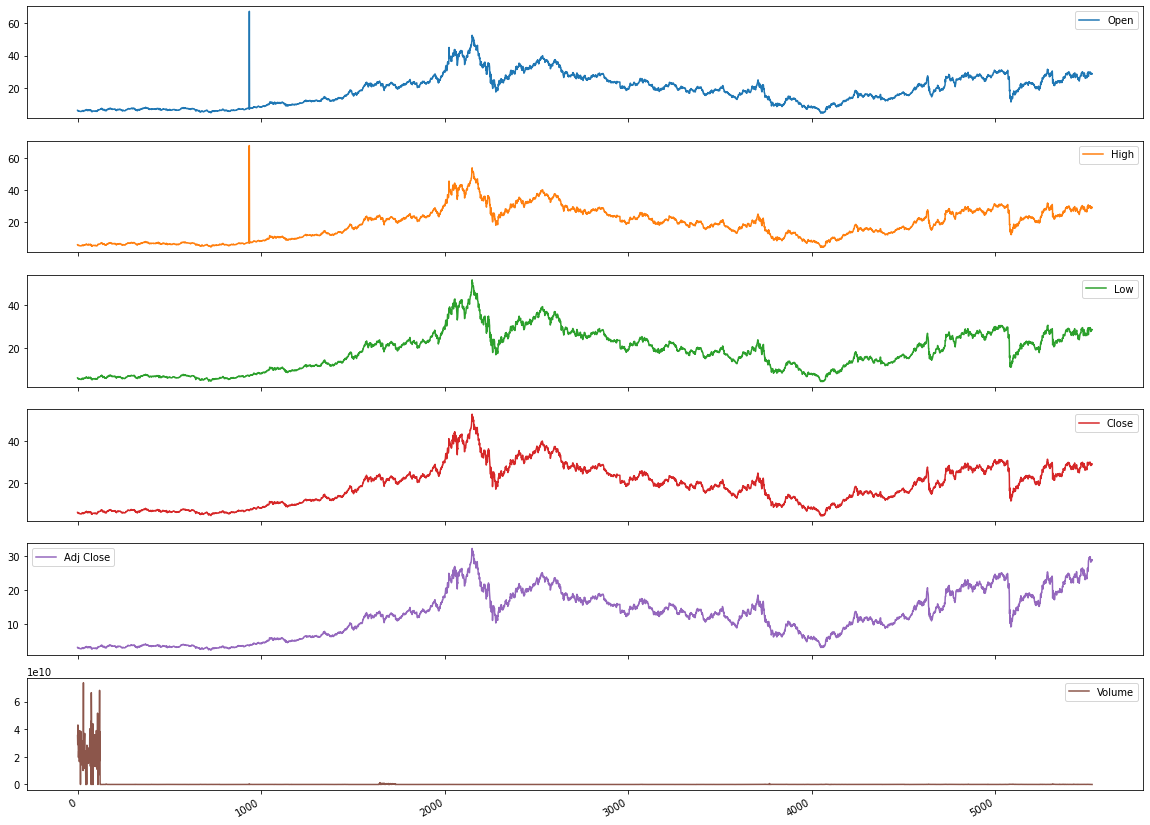

In [ ]:
# instanciando as colunas de interesse
feats = (df.columns[1:])

# plotando gráfico da série temporal
df[feats].plot(subplots=True, figsize=(20, 16));

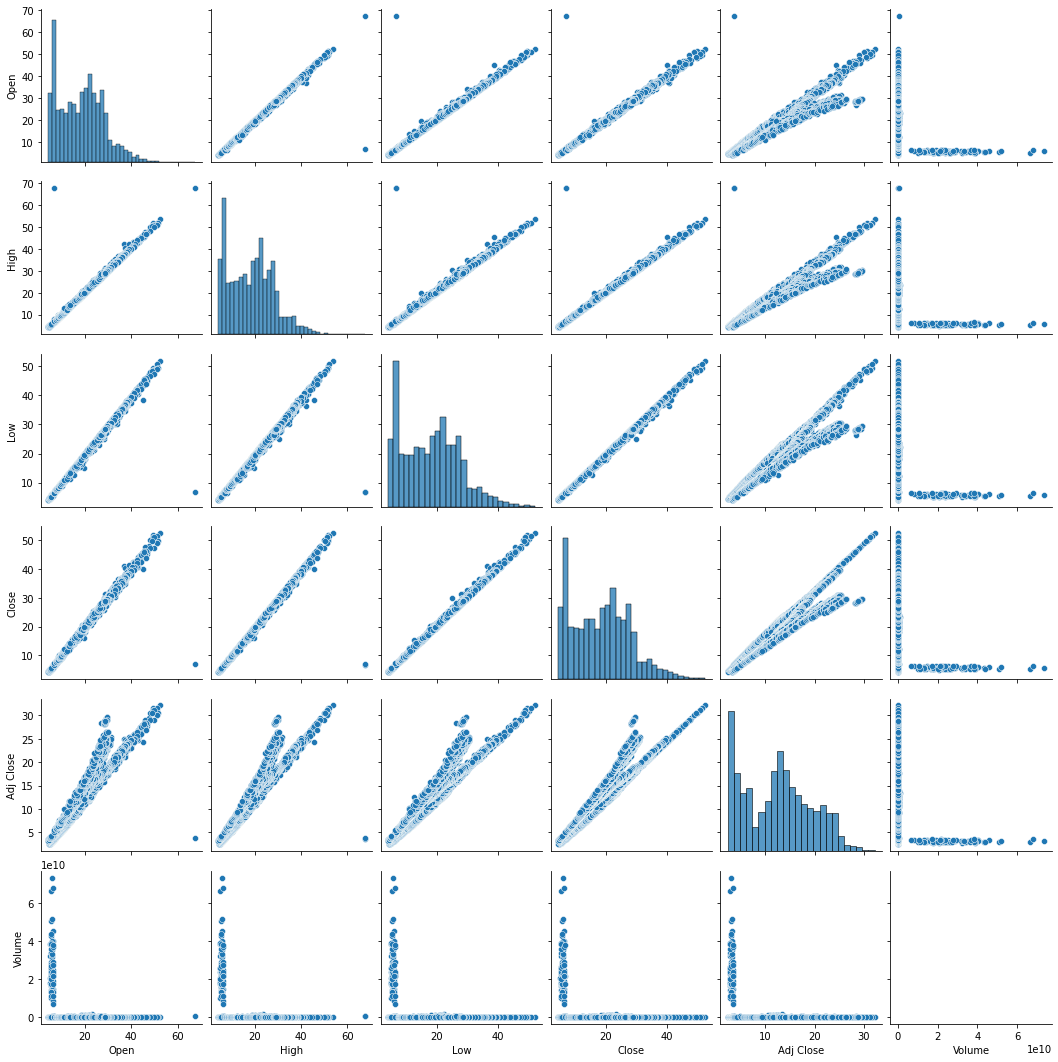

In [ ]:
# plotando gráfico da distribuição dos dados dos atributos
sns.pairplot(df);

In [ ]:
# correlação entre as variáveis
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.995951,0.995713,0.995265,0.954419,-0.181096
High,0.995951,1.000000,0.992002,0.992227,0.951529,-0.181963
Low,0.995713,0.992002,1.000000,0.999487,0.958628,-0.180326
Close,0.995265,0.992227,0.999487,1.000000,0.959046,-0.181468
Adj Close,0.954419,0.951529,0.958628,0.959046,1.000000,-0.185772
Volume,-0.181096,-0.181963,-0.180326,-0.181468,-0.185772,1.000000


In [ ]:
df.corr()['Adj Close']

Open         0.954419
High         0.951529
Low          0.958628
Close        0.959046
Adj Close    1.000000
Volume      -0.185772
Name: Adj Close, dtype: float64

In [ ]:
df.corr()[['Close', 'Adj Close']]

,Close,Adj Close
Open,0.995265,0.954419
High,0.992227,0.951529
Low,0.999487,0.958628
Close,1.000000,0.959046
Adj Close,0.959046,1.000000
Volume,-0.181468,-0.185772


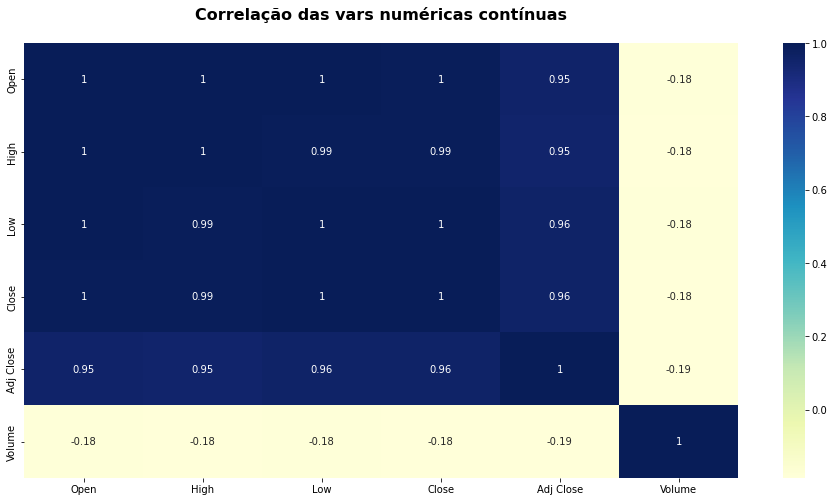

In [ ]:
# correlação das variáveis numéricas do conjunto de dados
plt.figure(figsize = (16,8))

sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True)
plt.title('Correlação das vars numéricas contínuas\n', 
          {'fontsize': 16,'fontweight': 'bold'});

In [ ]:
# instanciando o atributo "Adj Close" na variável "df_close"
df_close = df[['Date', 'Adj Close']]

In [ ]:
# visualizando o objeto criado
df_close

,Date,Adj Close
0,2000-01-03,3.203311
1,2000-01-04,3.026107
2,2000-01-05,2.995573
3,2000-01-06,2.985214
4,2000-01-07,2.998846
...,...,...
5524,2021-12-27,28.750000
5525,2021-12-28,28.780001
5526,2021-12-29,28.540001
5527,2021-12-30,28.500000


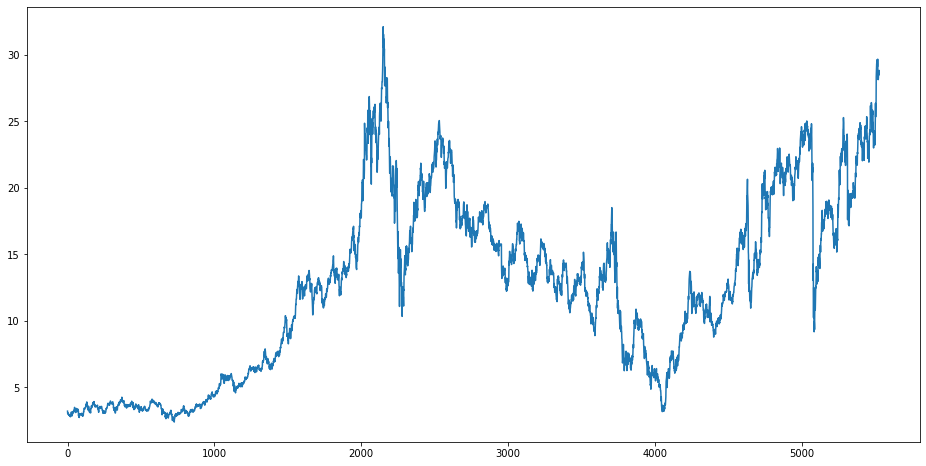

In [ ]:
# gráfico de linha da série temporal
df_close['Adj Close'].plot(secondary_y=data_PETR, figsize=(16,8));

In [ ]:
# visualizando os 10 primeiros índices
print(
    f'Data inicial: {df_close["Date"][:1]}',
    f'Data final: {df_close["Date"][-1:]}',
    sep='\n\n'
)

Data inicial: 0   2000-01-03
Name: Date, dtype: datetime64[ns]

Data final: 5528   2022-01-03
Name: Date, dtype: datetime64[ns]


In [ ]:
df_close

,Date,Adj Close
0,2000-01-03,3.203311
1,2000-01-04,3.026107
2,2000-01-05,2.995573
3,2000-01-06,2.985214
4,2000-01-07,2.998846
...,...,...
5524,2021-12-27,28.750000
5525,2021-12-28,28.780001
5526,2021-12-29,28.540001
5527,2021-12-30,28.500000


In [ ]:
# resetando o índice
df_close = df_close.set_index(pd.DatetimeIndex(
    df_close['Date'].values
))

# visualizando 5 amostras aleatórias
df_close.sample(5)

,Date,Adj Close
2012-04-13,2012-04-13,14.880378
2020-05-22,2020-05-22,15.174524
2021-12-20,2021-12-20,28.160000
2010-03-04,2010-03-04,22.300541
2010-09-14,2010-09-14,17.289129


In [ ]:
# estatística descritiva
df_close.describe().T

,count,mean,std,min,25%,50%,75%,max
Adj Close,5529.0,12.534519,6.770165,2.385444,6.258442,12.661593,17.450294,32.134396


In [ ]:
df_close.describe(include='all').T  # incluindo todos os atributos

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Date,5529,5529,2006-07-20,1,2000-01-03,2022-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adj Close,5529,NaN,NaT,NaN,NaT,NaT,12.5345,6.77016,2.38544,6.25844,12.6616,17.4503,32.1344


In [ ]:
# visualizando a estatística do atributo "Date"
df_close['Date'].describe()

count                    5529
unique                   5529
top       2006-07-20 00:00:00
freq                        1
first     2000-01-03 00:00:00
last      2022-01-03 00:00:00
Name: Date, dtype: object

In [ ]:
# removendo o atributo "Date"
df_close.drop('Date', axis=1, inplace=True)
df_close    # visualizando o conjunto de dados

,Adj Close
2000-01-03,3.203311
2000-01-04,3.026107
2000-01-05,2.995573
2000-01-06,2.985214
2000-01-07,2.998846
...,...
2021-12-27,28.750000
2021-12-28,28.780001
2021-12-29,28.540001
2021-12-30,28.500000


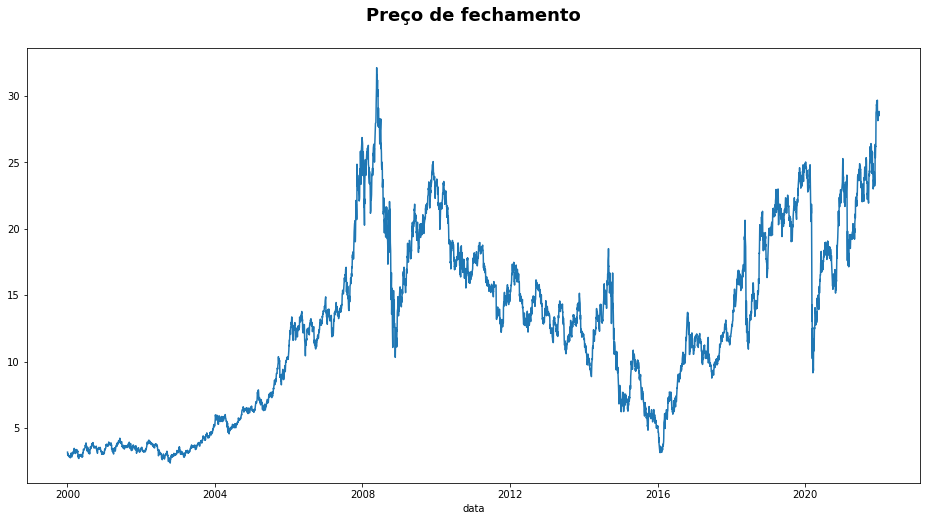

In [ ]:
# plotando gráfico da série temporal do atributo "Adj Close" (fechamento ajustado)
plt.figure(figsize=(16,8))
plt.title('Preço de fechamento\n', 
          {'fontsize': 18,'fontweight': 'bold'})

plt.plot(df_close['Adj Close'])
plt.xlabel('data');

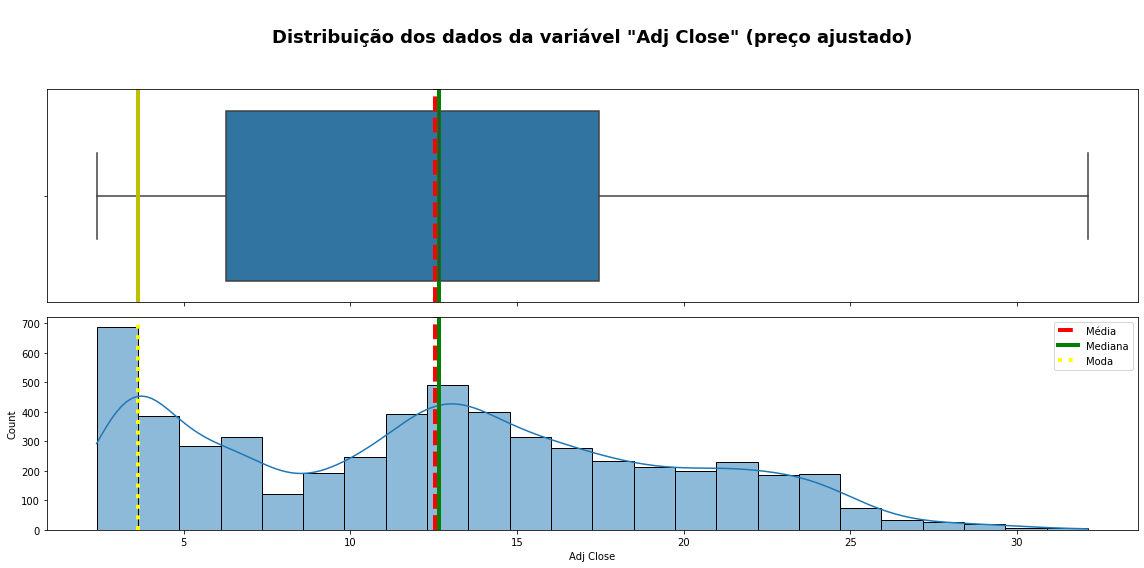

In [ ]:
# plotando gráficos - boxplot e histograma da distribuição dos dados da variável "Adj Close" (fechamento ajustado)
mean = df_close['Adj Close'].mean()
median = df_close['Adj Close'].median()
mode = df_close['Adj Close'].mode()[0]

fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                      figsize = (16,8))

sns.boxplot(data=df_close, x='Adj Close', ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--', linewidth=4)
ax_box.axvline(median, color='g', linestyle='-', linewidth=4)
ax_box.axvline(mode, color='y', linestyle='-', linewidth=4)
ax_box.set(xlabel='')
ax_box.set_title('\nDistribuição dos dados da variável "Adj Close" (preço ajustado)\n\n',
                 {'fontsize': 18,'fontweight': 'bold'})

sns.histplot(data=df_close, x='Adj Close', ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='red', linestyle='--', label='Média', linewidth=4)
ax_hist.axvline(median, color='green', linestyle='-', label='Mediana', linewidth=4)
ax_hist.axvline(mode, color='yellow', linestyle=':', label='Moda', linewidth=4)

ax_hist.legend()
plt.tight_layout();

In [ ]:
# separando os dados de treino e teste

linhas_df = df.shape[0]

base_treino = round(.70 * linhas_df)
base_teste = linhas_df - base_treino

print(
    f'Linhas de treino (70%) = 0:{base_treino}',
    f'Linhas de teste (30%) =  {base_treino}:{base_treino + base_teste}',
    sep='\n'
)

Linhas de treino (70%) = 0:3870
Linhas de teste (30%) =  3870:5529


In [ ]:
# normalizando os dados

scaler = StandardScaler()   # instanciando o objeto de normalização

# aplicando o objeto de normalização no conjunto de dados
# e o resultado instanciando no objeto "df_scaler"
df_scaled = scaler.fit_transform(df_close)

In [ ]:
# visualizando 10 linhas dos dados normalizados
df_scaled[:10]

array([[-1.37840831],
       [-1.40458499],
       [-1.40909545],
       [-1.41062565],
       [-1.40861203],
       [-1.39951074],
       [-1.41062565],
       [-1.40998156],
       [-1.4227073 ],
       [-1.41666642]])

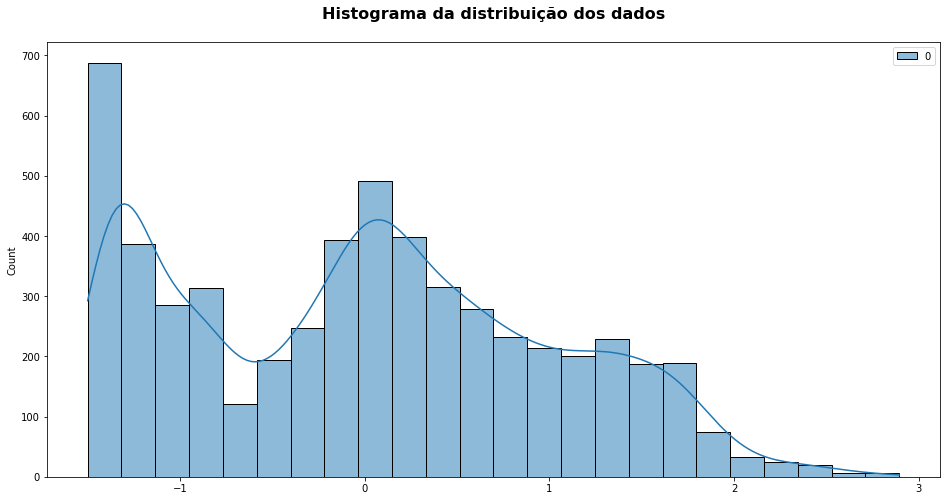

In [ ]:
# histograma da variável alvo
plt.figure(figsize=(16,8))

sns.histplot(data=df_scaled, kde=True)
plt.title('Histograma da distribuição dos dados\n', fontsize=16, fontweight='bold');

In [ ]:
train = df_scaled[:base_treino]
test = df_scaled[base_treino:base_treino + base_teste]

In [ ]:
len(train), len(test)

(3870, 1659)

In [ ]:
# função para converter os valores em uma matriz (array)
def create_df(df, steps=1):
    dataX, dataY = [], []

    for i in range(len(df) - steps - 1):
        data = df[i: (i + steps), 0]

        dataX.append(data)
        dataY.append(df[i + steps, 0])

    return np.array(dataX), np.array(dataY)


In [ ]:
# gerando os dados de treino e teste
steps = 15

X_train, y_train = create_df(train, steps)
X_test, y_test = create_df(test, steps)

In [ ]:
print(
    f'X_train: {X_train.shape}', 
    f'y_train: {y_train.shape}', 
    f'X_test: {X_test.shape}', 
    f'y_test: {y_test.shape}',
    sep='\n'
)

X_train: (3854, 15)
y_train: (3854,)
X_test: (1643, 15)
y_test: (1643,)


In [ ]:
# gerando os dados que o modelo espera
X_train = X_train.reshape(X_train.shape[0], 
                          X_train.shape[1], 1)

X_test = X_test.reshape(X_test.shape[0], 
                        X_test.shape[1], 1)

In [ ]:
# criando a rede neural
model = Sequential()
model.add(LSTM(75, return_sequences=True, input_shape=(steps, 1)))
model.add(LSTM(75, return_sequences=True))
model.add(LSTM(75))
model.add(Dropout(0.2))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 75)            23100     
                                                                 
 lstm_1 (LSTM)               (None, 15, 75)            45300     
                                                                 
 lstm_2 (LSTM)               (None, 75)                45300     
                                                                 
 dropout (Dropout)           (None, 75)                0         
                                                                 
 dense (Dense)               (None, 1)                 76        
                                                                 
Total params: 113,776
Trainable params: 113,776
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# treinando a rede neural
validation = model.fit(X_train, y_train, 
                       validation_data=(X_test, y_test),
                       epochs=50, batch_size=15, 
                       verbose=2)

Epoch 1/50
257/257 - 20s - loss: 0.0401 - val_loss: 0.0399 - 20s/epoch - 79ms/step
Epoch 2/50
257/257 - 6s - loss: 0.0187 - val_loss: 0.0207 - 6s/epoch - 23ms/step
Epoch 3/50
257/257 - 6s - loss: 0.0156 - val_loss: 0.0158 - 6s/epoch - 23ms/step
Epoch 4/50
257/257 - 6s - loss: 0.0130 - val_loss: 0.0143 - 6s/epoch - 23ms/step
Epoch 5/50
257/257 - 6s - loss: 0.0112 - val_loss: 0.0114 - 6s/epoch - 23ms/step
Epoch 6/50
257/257 - 6s - loss: 0.0106 - val_loss: 0.0108 - 6s/epoch - 23ms/step
Epoch 7/50
257/257 - 6s - loss: 0.0099 - val_loss: 0.0111 - 6s/epoch - 23ms/step
Epoch 8/50
257/257 - 6s - loss: 0.0088 - val_loss: 0.0100 - 6s/epoch - 23ms/step
Epoch 9/50
257/257 - 6s - loss: 0.0086 - val_loss: 0.0062 - 6s/epoch - 23ms/step
Epoch 10/50
257/257 - 6s - loss: 0.0078 - val_loss: 0.0061 - 6s/epoch - 23ms/step
Epoch 11/50
257/257 - 6s - loss: 0.0079 - val_loss: 0.0055 - 6s/epoch - 23ms/step
Epoch 12/50
257/257 - 7s - loss: 0.0083 - val_loss: 0.0058 - 7s/epoch - 26ms/step
Epoch 13/50
257/257 - 6

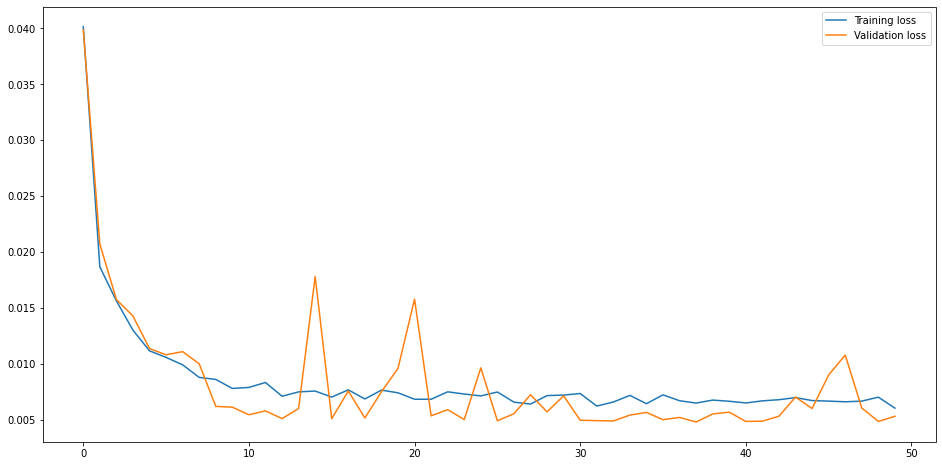

In [ ]:
plt.figure(figsize=(16,8))

plt.plot(validation.history['loss'], label='Training loss')
plt.plot(validation.history['val_loss'], label='Validation loss')
plt.legend();

In [ ]:
# realizando as predições
pred = model.predict(X_test)
pred = scaler.inverse_transform(pred)

pred[:10]

array([[10.271425],
       [ 9.923674],
       [ 9.774133],
       [ 9.450912],
       [ 9.578454],
       [ 9.641439],
       [ 9.398818],
       [ 9.434124],
       [ 9.810134],
       [ 9.713289]], dtype=float32)

In [ ]:
# # realizando as predições
# pred = model.predict(X_test)
# pred = scaler.inverse_transform(pred)

# pred[:10]

array([[10.2079115],
       [ 9.862797 ],
       [ 9.633626 ],
       [ 9.356501 ],
       [ 9.474907 ],
       [ 9.563451 ],
       [ 9.30374  ],
       [ 9.31463  ],
       [ 9.736647 ],
       [ 9.655244 ]], dtype=float32)

In [ ]:
# previsão para os próximos 10 dias
lenght_test = len(test)
lenght_test

1659

In [ ]:
# os últimos dias que são o tamanho do meu step
days_input_steps = lenght_test - steps
days_input_steps

1644

In [ ]:
# transformando os dados em um array
input_steps = test[days_input_steps:]
input_steps = np.array(input_steps).reshape(1,-1)
input_steps

array([[2.52830307, 2.50171338, 2.45001152, 2.47660092, 2.53421201,
        2.43080773, 2.30819993, 2.31410888, 2.30819993, 2.33331239,
        2.3953549 , 2.39978661, 2.36433378, 2.35842484, 2.40717251]])

In [ ]:
# transformando em uma lista
list_output_steps = list(input_steps)
list_output_steps = list_output_steps[0].tolist()
list_output_steps

[2.5283030679957585,
 2.501713378195765,
 2.450011516644682,
 2.4766009246906617,
 2.5342120131753187,
 2.430807726565125,
 2.308199931629389,
 2.314108876808949,
 2.308199931629389,
 2.333312385134492,
 2.395354900749805,
 2.3997866096344755,
 2.3643337838191556,
 2.358424838639596,
 2.407172509354912]

In [ ]:
# loop para prever os próximos 10 dias
pred_output = []
i = 0
n_future = 10

while(i < n_future):
    if (len(list_output_steps) > steps):

        input_steps = np.array(list_output_steps[1:])
        print('{} dia. Valores de entrada ----> {}'.format(i, input_steps))

        input_steps = input_steps.reshape(1,-1)
        input_steps = input_steps.reshape((1, steps, 1))
        # print(input_steps)

        pred = model.predict(input_steps, verbose=0)
        print('{} dia. Valor previsto ----> {}'.format(i, pred))
        
        list_output_steps.extend(pred[0].tolist())
        list_output_steps = list_output_steps[1:]
        # print(list_output_steps)

        pred_output.extend(pred.tolist())
        i = i + 1

    else:
        inpu_steps = input_steps.reshape((1, steps, 1))
        pred = model.predict(input_steps, verbose=0)
        # print(pred[0])

        list_output_steps.extend(pred[0].tolist())
        # print(len(list_output_steps))

        pred_output.extend(pred.tolist())
        i = i + 1

print(pred_output)   


1 dia. Valores de entrada ----> [2.50171338 2.45001152 2.47660092 2.53421201 2.43080773 2.30819993
 2.31410888 2.30819993 2.33331239 2.3953549  2.39978661 2.36433378
 2.35842484 2.40717251 2.34669042]
1 dia. Valor previsto ----> [[2.283554]]
2 dia. Valores de entrada ----> [2.45001152 2.47660092 2.53421201 2.43080773 2.30819993 2.31410888
 2.30819993 2.33331239 2.3953549  2.39978661 2.36433378 2.35842484
 2.40717251 2.34669042 2.28355408]
2 dia. Valor previsto ----> [[2.2252119]]
3 dia. Valores de entrada ----> [2.47660092 2.53421201 2.43080773 2.30819993 2.31410888 2.30819993
 2.33331239 2.3953549  2.39978661 2.36433378 2.35842484 2.40717251
 2.34669042 2.28355408 2.22521186]
3 dia. Valor previsto ----> [[2.173554]]
4 dia. Valores de entrada ----> [2.53421201 2.43080773 2.30819993 2.31410888 2.30819993 2.33331239
 2.3953549  2.39978661 2.36433378 2.35842484 2.40717251 2.34669042
 2.28355408 2.22521186 2.17355394]
4 dia. Valor previsto ----> [[2.1249437]]
5 dia. Valores de entrada ----

In [ ]:
# transformando a saída
prev = scaler.inverse_transform(pred_output)
prev = np.array(prev).reshape(1,-1)
list_output_prev = list(prev)
list_output_prev = prev[0].tolist()
list_output_prev

[28.420563210342586,
 27.993158437780835,
 27.5982077183308,
 27.248506741920348,
 26.919437362930175,
 26.602949013580236,
 26.296452858521853,
 25.999005522280395,
 25.71016477238359,
 25.429460131584463]

In [ ]:
# as datas de previsões
dates = pd.to_datetime(df['Date'])
predict_dates = pd.date_range(list(dates)[-1] + pd.DateOffset(1), 
                              periods=10, freq='b').tolist()

predict_dates                            

[Timestamp('2022-01-04 00:00:00', freq='B'),
 Timestamp('2022-01-05 00:00:00', freq='B'),
 Timestamp('2022-01-06 00:00:00', freq='B'),
 Timestamp('2022-01-07 00:00:00', freq='B'),
 Timestamp('2022-01-10 00:00:00', freq='B'),
 Timestamp('2022-01-11 00:00:00', freq='B'),
 Timestamp('2022-01-12 00:00:00', freq='B'),
 Timestamp('2022-01-13 00:00:00', freq='B'),
 Timestamp('2022-01-14 00:00:00', freq='B'),
 Timestamp('2022-01-17 00:00:00', freq='B')]

In [ ]:
# criando um dataframe com as previsões
forecast_dates = []

for i in predict_dates:
    forecast_dates.append(i.date())

df_forecast = pd.DataFrame(
    {'data_pregao': np.array(forecast_dates), 
     'preco_fechamento': list_output_prev}
)

df_forecast['data_pregao'] = pd.to_datetime(df_forecast['data_pregao'])


df_forecast = df_forecast.set_index(pd.DatetimeIndex(
    df_forecast['data_pregao'].values
))

df_forecast.drop('data_pregao', axis=1, inplace=True)
df_forecast

,preco_fechamento
2022-01-04,28.420563
2022-01-05,27.993158
2022-01-06,27.598208
2022-01-07,27.248507
2022-01-10,26.919437
2022-01-11,26.602949
2022-01-12,26.296453
2022-01-13,25.999006
2022-01-14,25.710165
2022-01-17,25.429460


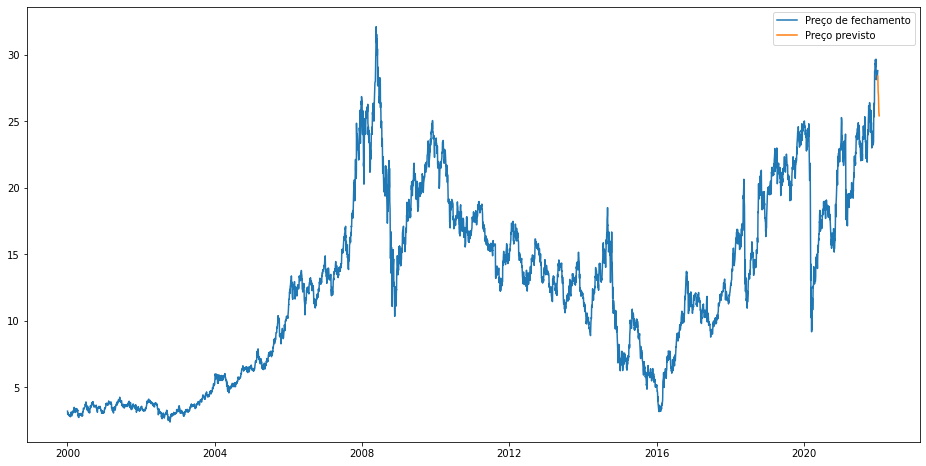

In [ ]:
# plotando o gráfico
plt.figure(figsize=(16,8))

plt.plot(df_close['Adj Close'])
plt.plot(df_forecast['preco_fechamento'])
plt.legend(['Preço de fechamento', 'Preço previsto'])
plt.show();

**Vamos melhorar a exibição do gráfico!!**

In [ ]:
# visualizando o conjunto de dados original
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,5.875000,5.875000,5.875000,5.875000,3.203311,35389440000
1,2000-01-04,5.550000,5.550000,5.550000,5.550000,3.026107,28861440000
2,2000-01-05,5.494000,5.494000,5.494000,5.494000,2.995573,43033600000
3,2000-01-06,5.475000,5.475000,5.475000,5.475000,2.985214,34055680000
4,2000-01-07,5.500000,5.500000,5.500000,5.500000,2.998846,20912640000
...,...,...,...,...,...,...,...
5524,2021-12-27,28.320000,28.780001,28.150000,28.750000,28.750000,44227900
5525,2021-12-28,29.010000,29.280001,28.700001,28.780001,28.780001,30688100
5526,2021-12-29,28.700001,28.900000,28.420000,28.540001,28.540001,35508400
5527,2021-12-30,28.549999,28.700001,28.389999,28.500000,28.500000,30387600


In [ ]:
# instanciando o recorte de tempo no df original
df_2021 = df_close.loc['2021':] # de 2021 em diante
df_2021

,Adj Close
2021-01-04,23.497818
2021-01-05,24.416273
2021-01-06,24.465038
2021-01-07,25.196552
2021-01-08,25.294088
...,...
2021-12-27,28.750000
2021-12-28,28.780001
2021-12-29,28.540001
2021-12-30,28.500000


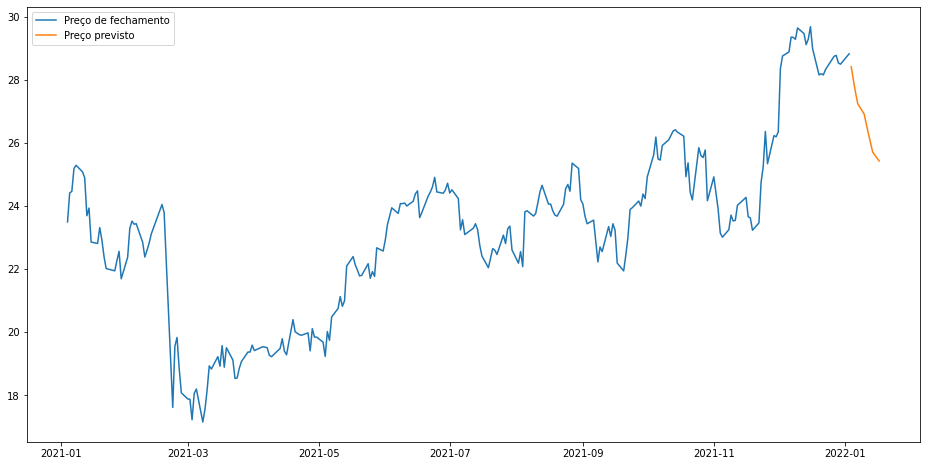

In [ ]:
# plotando o gráfico
plt.figure(figsize=(16,8))

plt.plot(df_2021['Adj Close'])
plt.plot(df_forecast['preco_fechamento'])
plt.legend(['Preço de fechamento', 'Preço previsto'])
plt.show();